Columns in dataset1: ['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start', 'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward', 'month', 'sunset_time', 'hours_after_sunset', 'season']
Columns in dataset2: ['time', 'month', 'hours_after_sunset', 'bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number']

--- Dataset 1: Descriptive Statistics ---
              start_time  bat_landing_to_food habit  rat_period_start  \
count                907           907.000000   866               907   
unique               628                  NaN    81               268   
top     28/01/2018 20:05                  NaN  fast  26/04/2018 22:25   
freq                   6                  NaN   245                29   
mean                 NaN            11.713134   NaN               NaN   
std                  NaN            27.644410   NaN               NaN   
min                  NaN             0.010238   NaN               NaN   
25%                  Na

/tmp/ipython-input-3165751615.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="risk", data=df1, palette="husl")


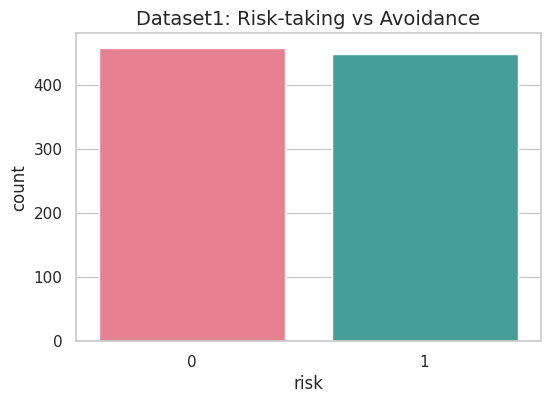

/tmp/ipython-input-3165751615.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="reward", data=df1, palette="Set2")


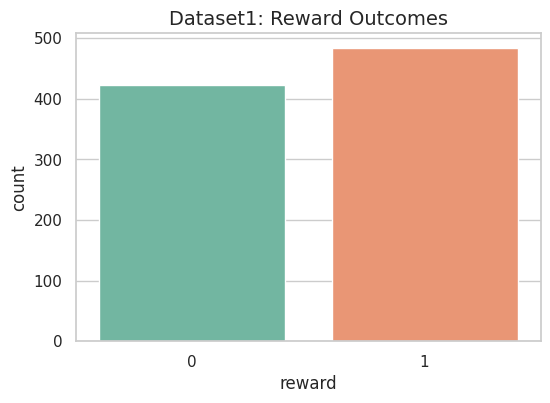

/tmp/ipython-input-3165751615.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="risk", y="bat_landing_to_food", data=df1, palette="coolwarm")


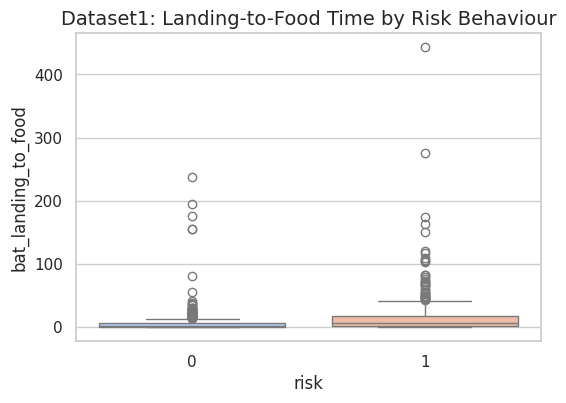

/tmp/ipython-input-3165751615.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="season", data=df1, palette="viridis")


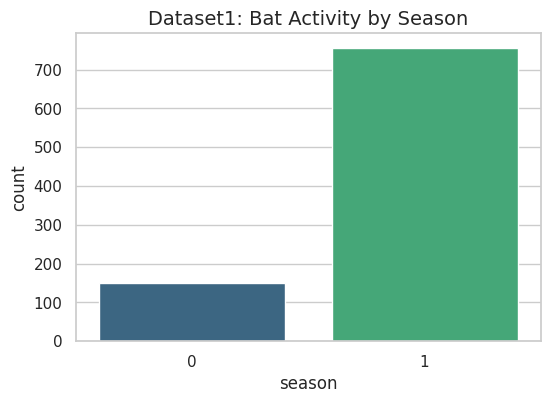

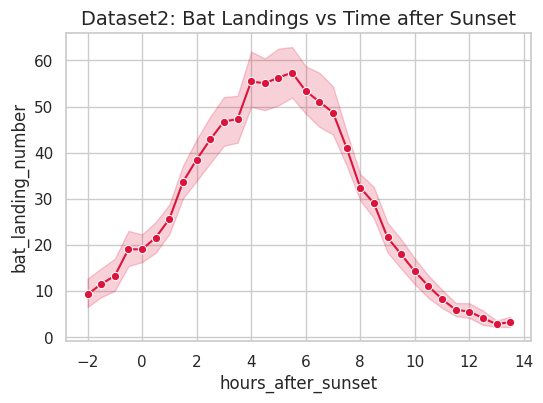

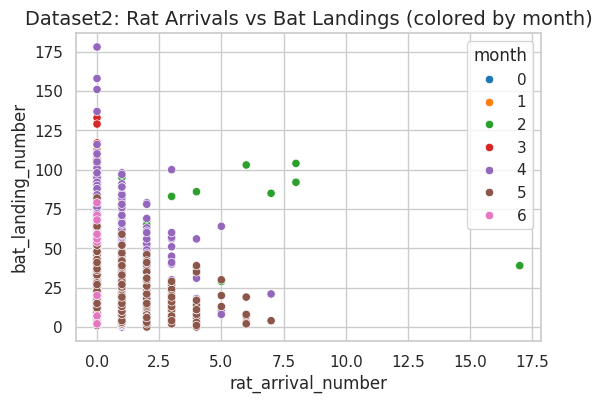

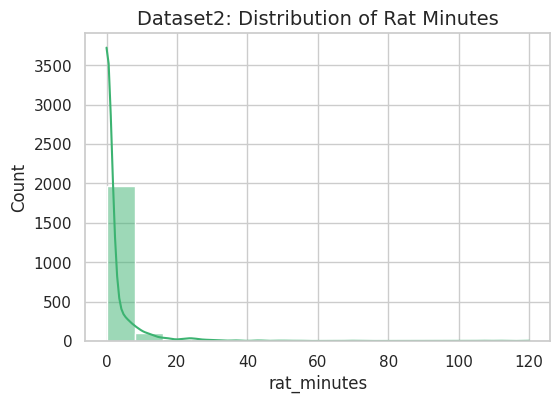

/tmp/ipython-input-3165751615.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2["food_availability"], palette="pastel")


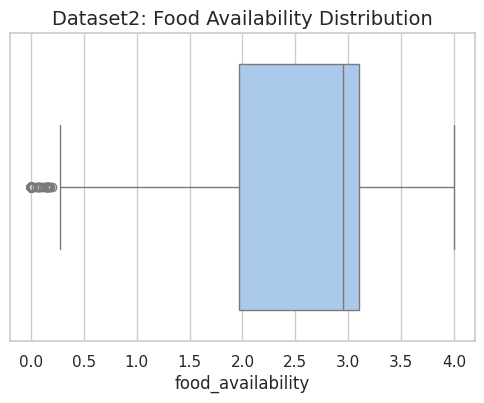


Chi-square Test (Risk vs Reward):
Chi2 = 352.83381148693195 , p-value = 1.0233966969013452e-78

Mann-Whitney U Test (Landing-to-Food Time by Risk):
Statistic = 68002.0 , p-value = 8.431265724019709e-19

Analysis complete.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu

# Use a modern style
sns.set_theme(style="whitegrid")


# Step 1: Load datasets

df1 = pd.read_csv("/content/dataset1(1).csv")
df2 = pd.read_csv("/content/dataset2(1).csv")

print("Columns in dataset1:", df1.columns.tolist())
print("Columns in dataset2:", df2.columns.tolist())


# Step 2: Descriptive Statistics

print("\n--- Dataset 1: Descriptive Statistics ---")
print(df1.describe(include="all"))

print("\n--- Dataset 2: Descriptive Statistics ---")
print(df2.describe(include="all"))


# Step 3: Visualisations for dataset1

plt.figure(figsize=(6,4))
sns.countplot(x="risk", data=df1, palette="husl")
plt.title("Dataset1: Risk-taking vs Avoidance", fontsize=14)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="reward", data=df1, palette="Set2")
plt.title("Dataset1: Reward Outcomes", fontsize=14)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="risk", y="bat_landing_to_food", data=df1, palette="coolwarm")
plt.title("Dataset1: Landing-to-Food Time by Risk Behaviour", fontsize=14)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="season", data=df1, palette="viridis")
plt.title("Dataset1: Bat Activity by Season", fontsize=14)
plt.show()


# Step 4: Visualisations for dataset2

plt.figure(figsize=(6,4))
sns.lineplot(x="hours_after_sunset", y="bat_landing_number", data=df2,
             marker="o", color="crimson")
plt.title("Dataset2: Bat Landings vs Time after Sunset", fontsize=14)
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="rat_arrival_number", y="bat_landing_number",
                data=df2, hue="month", palette="tab10")
plt.title("Dataset2: Rat Arrivals vs Bat Landings (colored by month)", fontsize=14)
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df2["rat_minutes"], bins=15, kde=True, color="mediumseagreen")
plt.title("Dataset2: Distribution of Rat Minutes", fontsize=14)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df2["food_availability"], palette="pastel")
plt.title("Dataset2: Food Availability Distribution", fontsize=14)
plt.show()


# Step 5: Inferential Statistics

if "risk" in df1.columns and "reward" in df1.columns:
    cont_table = pd.crosstab(df1["risk"], df1["reward"])
    chi2, p, _, _ = chi2_contingency(cont_table)
    print("\nChi-square Test (Risk vs Reward):")
    print("Chi2 =", chi2, ", p-value =", p)

if "risk" in df1.columns and "bat_landing_to_food" in df1.columns:
    risk0 = df1[df1["risk"] == 0]["bat_landing_to_food"]
    risk1 = df1[df1["risk"] == 1]["bat_landing_to_food"]
    stat, p = mannwhitneyu(risk0, risk1)
    print("\nMann-Whitney U Test (Landing-to-Food Time by Risk):")
    print("Statistic =", stat, ", p-value =", p)

print("\nAnalysis complete.")
